# Ellbow-Kriterium bei unterschiedlichen Verteilungen

In [31]:
import numpy as np

sigmafaktor = 1.0
x = np.random.normal(15, 1*sigmafaktor, 1000)
y = np.random.normal(15, 1.5*sigmafaktor, 1000)

x = np.append(x, np.random.normal(10, 1*sigmafaktor, 1000))
y = np.append(y, np.random.normal(10, 1*sigmafaktor, 1000))

x = np.append(x, np.random.normal(15, 0.5*sigmafaktor, 1000))
y = np.append(y, np.random.normal(8, 1*sigmafaktor, 1000))

x = np.append(x, np.random.normal(13, 0.4*sigmafaktor, 1000))
y = np.append(y, np.random.normal(10, 0.4*sigmafaktor, 1000))

x = np.append(x, np.random.normal(5, 0.5*sigmafaktor, 1000))
y = np.append(y, np.random.normal(5, 0.5*sigmafaktor, 1000))



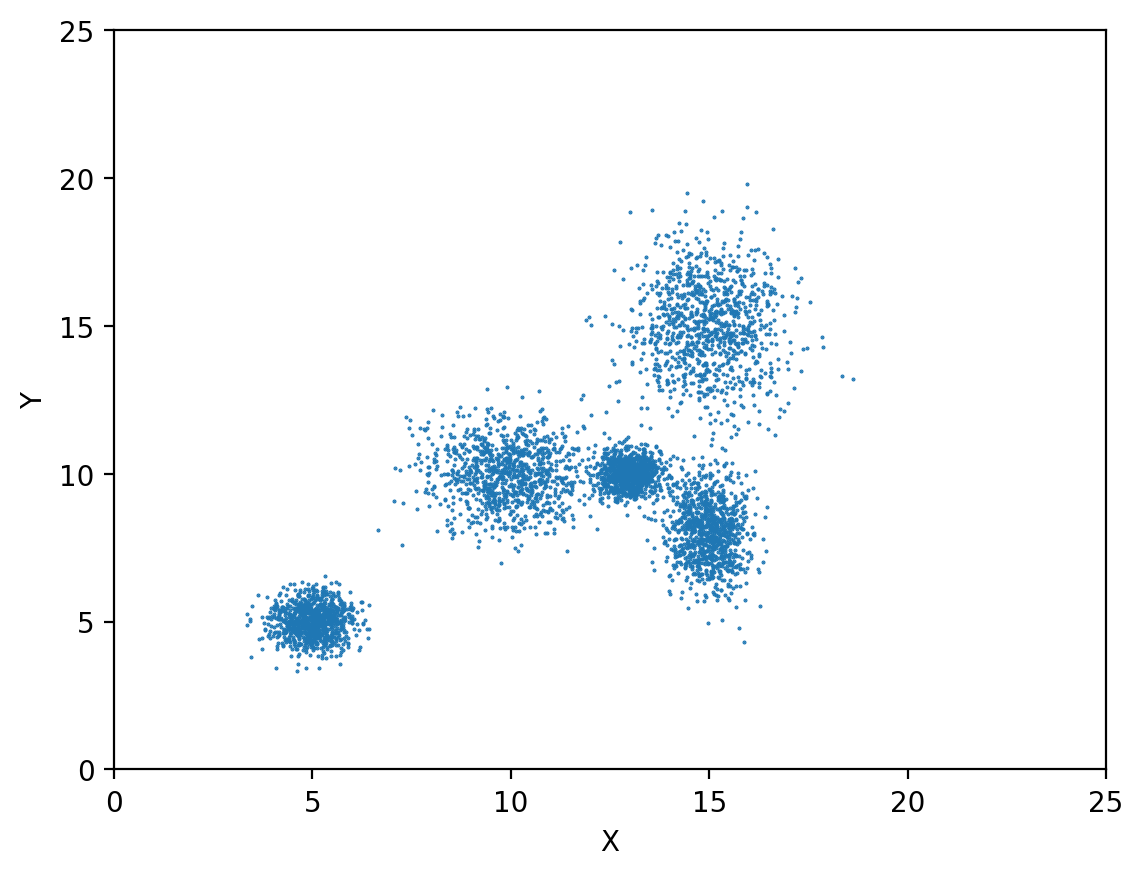

In [32]:
import matplotlib.pyplot as plt
%matplotlib inline
%config InlineBackend.figure_formats = set(["retina"])
plt.scatter(x, y, s=0.2)
plt.xlim(0, 25)
plt.ylim(0, 25)
plt.xlabel("X")
plt.ylabel("Y")
plt.show()

In [33]:
import pandas as pd
d = {'x': x, 'y': y}
data = pd.DataFrame(data=d)

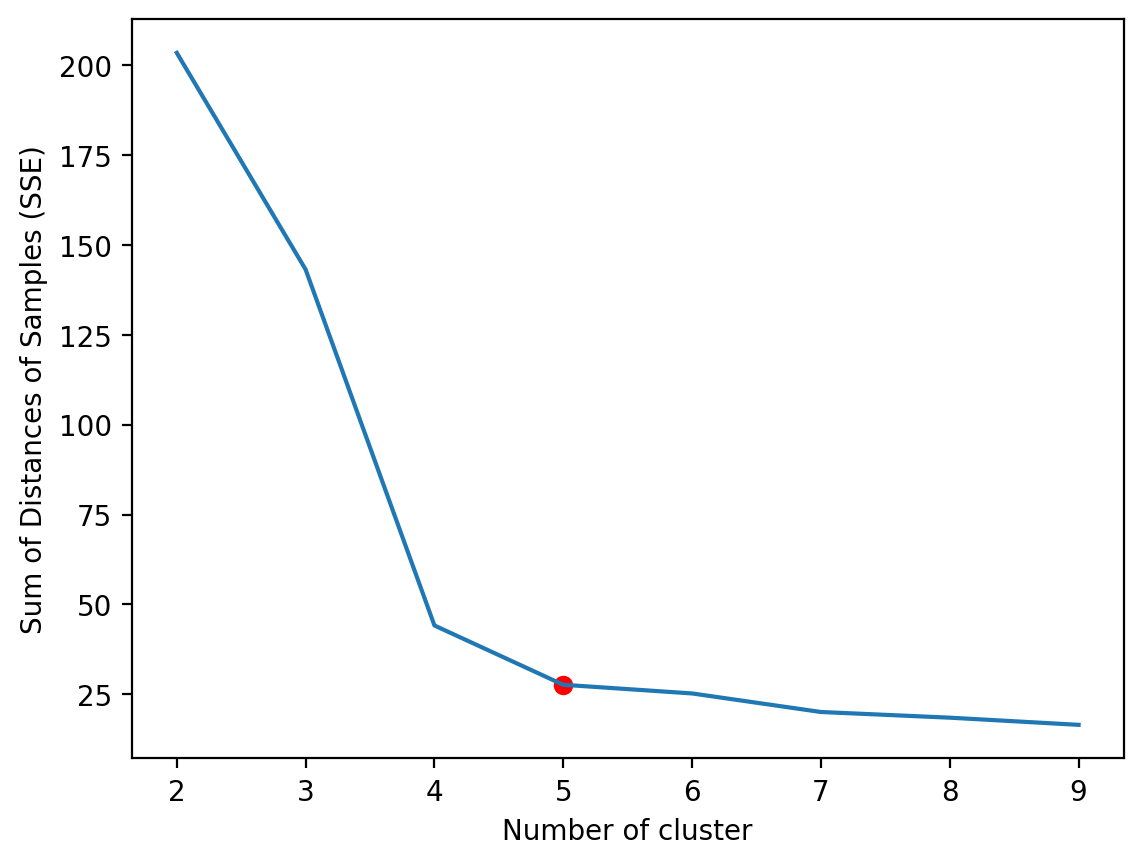

In [34]:
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt

sse = {}
sil_coeff = {}
verbesserung = []
verbesserung.append(1)
for k in range(2, 10):  # Wir probieren alle Clustergrößen von 1 bis 10 aus....
    kmeans = KMeans(n_clusters=k, max_iter=1000).fit(data)
    sse[k] = kmeans.inertia_ / 250 # Inertia: Sum of distances of samples to their closest cluster center
   
plt.figure()
plt.plot(list(sse.keys()), list(sse.values()))
plt.xlabel("Number of cluster")
plt.ylabel("Sum of Distances of Samples (SSE)")

# Wo ist der Ellenbogen? - Dort wo die Änderung am dichtesten bei 50% Änderung ist
plt.scatter(5, sse[5], color='red')

plt.show()

In [35]:
sse

{2: 203.5106565324131,
 3: 143.21346565724906,
 4: 44.115811325553565,
 5: 27.612559694328972,
 6: 25.19784087984704,
 7: 20.0314435724535,
 8: 18.453159024271827,
 9: 16.457750793266687}

In [36]:
for s in sse.values():
    print(s / sse[2])

1.0
0.7037148230831808
0.21677396199902313
0.13568114891286356
0.12381583013484006
0.09842945776779555
0.09067416585790826
0.08086923345287063
